### Worksheet 4: Welcome to the world of variable stars. Due March 19 at 2pm.

#### Original work statement: 

Please write your name here to indicate that your worksheet is the result of your own work, and you have not copied from sources without citing them (this is plagiarism and is not acceptable). Identical or very similar worksheet will share the credit.

#### Your name: Meryem El baz

#### Data description

The data we use for this worksheet are about stars. Our features are the so-called "colors", which give an indication of whether a star emits more blue, green, yellow, or red light. We are trying to predict whether a star is a special type of star called a RR-Lyrae variable star. So our target values will be yes/no (1/0 in the language of numpy arrays).

1\. Load the data for features and target from the appropriate files and save them as numpy arrays. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = np.genfromtxt('RRLyrae_features.txt', delimiter=",")

In [3]:
data1 = np.genfromtxt('RRLyrae_labels.txt', delimiter=",")

In [4]:
data

array([[ 0.39400032,  1.25099932,  0.13700032,  0.06199932],
       [ 0.33900132,  1.04800032,  0.15199932,  0.02300132],
       [ 0.34199932,  1.00800132,  0.12900032,  0.20300132],
       ...,
       [ 0.21200032,  1.04400132,  0.03500032,  0.00200132],
       [ 0.17200132,  1.06499932,  0.04200032,  0.00300032],
       [ 0.06500132,  1.12599932, -0.01700032, -0.05799932]])

In [5]:
data1

array([0., 0., 0., ..., 1., 1., 1.])

# 2\. Answer the following questions:

Is this a classification or regression problem?

Is this supervised or unsupervised learning?

How many instances are in this data set? 

How many features? What is their range?

How many RR Lyrae are in the data set? 

What would be the accuracy of a classifier that classifies all objects in the data set as non-RR Lyrae?


In [6]:
data1.size   # size of instances

93141

In [7]:
data.size/data1.size  #size of features: we have 4 features

4.0

In [8]:
print(data.max())   #range of the features
print(data.min())

1.34999932
-0.20999932


In [9]:
range(data1.size)

range(0, 93141)

In [10]:
flag=0          #this code will give us how many RRLyrae in the data
for i in range(data1.size):
    if data1[i]==1:
        flag=flag+1

In [11]:
print(flag)

483


Text(0.5, 1.0, ' ')

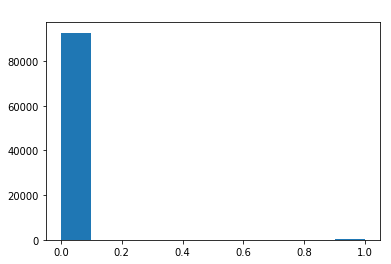

In [12]:
plt.hist(data1)
plt.title(" ")


The accuracy of a classifier that classifies all objects in the data set as non-RR Lyrae would be very high (maybe ~99%) because we have a very small number of RR-Lyrae stars compared to non-RR-Lyrae ones.

3\. Build a decision tree classifier for this data set, using an 80/20 train test split like last time. What is the performance on the test set?

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix


In [14]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
x=data
y=data1
xtrain, xtest, ytrain, ytest = train_test_split(x,y,\
                                                              test_size = 0.2,random_state=0) 

model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)


0.9951151430565248

We can now implement the k-fold cross validation algorithm using the following syntax (note that this assumes that your algorithm is called 'model'):

http://scikit-learn.org/stable/modules/cross_validation.html

In [15]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, x, y, cv=5)

In [16]:
#Note: if you want to also save the predicted labels, you can do
    
from sklearn.model_selection import cross_val_predict

data1pred = cross_val_predict(model, x, y, cv=5)


4\. Report the scores, and calculate the mean and standard deviation of the scores vector. 

In [17]:
scores = cross_val_score(model, x, y, cv=5, scoring= 'accuracy')
print(scores)
print(scores.mean())
print(scores.std())

[0.99398787 0.99468571 0.99527618 0.99602727 0.99350405]
0.9946962162504803
0.0008979076187538164


In [18]:
scores = cross_val_score(model, x, y, cv=5, scoring= 'recall')
print(scores)
print(scores.mean())
print(scores.std())

[0.50515464 0.50515464 0.62886598 0.48958333 0.42708333]
0.5111683848797252
0.06551528733067823


5\. Calculate and plot the confusion matrix for your model (Note: you will need to copy/paste the "plot_confusion_matrix" function from one of the previous notebooks, and use the function cross_val_predict to get the predicted labels). 

In [19]:
from sklearn.metrics import confusion_matrix

import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [20]:
x.size

372564

In [21]:
y.size

93141

In [22]:
ypred.size

18629

In [23]:
xtest.size

74516

Confusion matrix, without normalization
[[18498    49]
 [   42    40]]


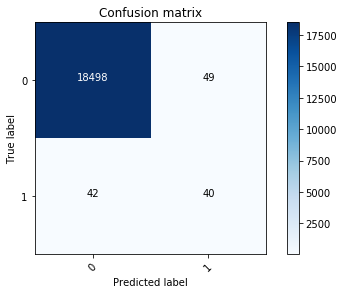

In [24]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(ytest, ypred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'],
                      title='Confusion matrix')

6\. Based on the confusion matrix, how many true positive, true negative, false positive, false negative instances do you have?

7\. Based on the definitions given on the slides, calculate accuracy, precision and recall. <b>Important:</b> You need to use the formula, not the built-in functions, and write the steps!

8\. Which evaluation metric is used by the cross validation score above? [To answer this question, you might need to check out the description of the function]. Given the distribution of classes in your data set, do you see a possible issue?

Other evaluation metrics can be found in scikit using the code below.

More info: http://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics


In [25]:
from sklearn import metrics

print(metrics.accuracy_score(ytest, ypred))    
print(metrics.recall_score(ytest, ypred))      
print(metrics.precision_score(ytest, ypred))   
print(metrics.f1_score(ytest, ypred))  


0.9951151430565248
0.4878048780487805
0.449438202247191
0.4678362573099415


9\. What happens to each of the metrics above if you flip y_test and y_pred in the above? 


In [26]:
print(metrics.accuracy_score(ypred, ytest))    
print(metrics.recall_score(ypred, ytest))      
print(metrics.precision_score(ypred, ytest))   
print(metrics.f1_score(ypred, ytest)) 

0.9951151430565248
0.449438202247191
0.4878048780487805
0.4678362573099415




10\. To compare performance for now, let's use the F1 score, a weighted average of precision and recall.

F1 = 2 * (precision * recall) / (precision + recall)

Find out how to use the f1 score (instead of accuracy) as an optional argument of the cross_val_score function and report the mean and standard deviation of the scores associated to this evaluation metric.

Relevant docs: 

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score

In [27]:
scores = cross_val_score(model, x, y, cv=5, scoring= 'f1')
print(scores)
print(scores.mean())
print(scores.std())

[0.47 0.48 0.58 0.58 0.43]
0.5061712475241709
0.06158705976003264


11\. It is now time to look at some diagnostics. Use an 80/20 training split (so each fold is 20% of the data, like in your cross validation). Report the f1 score obtained by your model
when applied to the training set (i.e. when you predict the labels of the training set). How does it compare with the cross validation score? Based on this result, do you think your algorithm suffers from high variance or high bias and why?

In [28]:
scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring= 'f1')
print(scores)
print(scores.mean())
print(scores.std())

[0.53 0.53 0.56 0.56 0.51]
0.5358293369970017
0.0188435031372053


In [44]:
scores = cross_val_score(model, xtrain, ytrain, cv=5)
print(scores)
print(scores.mean())
print(scores.std())

[0.99 1.   1.   0.99 1.  ]
0.995061202504421
0.00022687301850448174


Finally, we can look at learning curves. 

Give your data set a good shuffle using the following code:

In [29]:
from sklearn.utils import shuffle

x, y = shuffle(x, y, random_state=13)

To build learning curves, we need to check how the performance of our algorithm changes when using an increasing amount of data. We will check the scores that we obtain when using 20, 40, 60, 80 and 100% of our data set.

The following lines demonstrate how to do this to create a new, smaller data set that contains the first 20% of your original data set:    

In [30]:
number_samples = x.shape[0] #total size of data set 

xlittle, ylittle = x[:int(number_samples*0.2),:], y[:int(number_samples*0.2)] #what does this do?
#this command gives us 20%(data) of features and labels

In [31]:
ylittle

array([0., 0., 0., ..., 0., 0., 0.])

In [32]:
np.sum(ylittle > 0.5), np.sum(ylittle < 0.5)

(94, 18534)

12\. Calculate the mean and the standard deviation of the 5-fold cross validation score for the data set above (don't forget to use 'f1' as the scoring parameter of the 'cross_val_score' function, otherwise it will default to accuracy).

In [33]:
scores1 = cross_val_score(model, xlittle, ylittle, cv=5, scoring='f1')
print(scores1) 
print(np.mean(scores1))
print(np.std(scores1))

[0.38 0.4  0.48 0.41 0.6 ]
0.4546966546966547
0.08101028783920539


13\. Now do the same but using 40, 60, 80 and 100% of your data set. 

In [34]:
xlittle, ylittle = x[:int(number_samples*0.4),:], y[:int(number_samples*0.4)]

In [35]:
scores2 = cross_val_score(model, xlittle, ylittle, cv=5, scoring='f1')
print(scores2) 
print(np.mean(scores2))
print(np.std(scores2))

[0.57 0.47 0.54 0.55 0.38]
0.5020453366531799
0.07202536933636089


In [36]:
xlittle, ylittle = x[:int(number_samples*0.6),:], y[:int(number_samples*0.6)]

In [37]:
scores3 = cross_val_score(model, xlittle, ylittle, cv=5, scoring='f1')
print(scores3) 
print(np.mean(scores3))
print(np.std(scores3))

[0.5  0.47 0.42 0.64 0.49]
0.5037952842118967
0.07119049586295996


In [38]:
xlittle, ylittle = x[:int(number_samples*0.8),:], y[:int(number_samples*0.8)]

In [39]:
scores4 = cross_val_score(model, xlittle, ylittle, cv=5, scoring='f1')
print(scores4) 
print(np.mean(scores4))
print(np.std(scores4))

[0.47 0.5  0.53 0.51 0.55]
0.5112125776260774
0.024408996842435582


In [40]:
xlittle, ylittle = x[:int(number_samples),:], y[:int(number_samples)]

In [41]:
scores5 = cross_val_score(model, xlittle, ylittle, cv=5, scoring='f1')
print(scores5) 
print(np.mean(scores5))
print(np.std(scores5))

[0.53 0.51 0.56 0.54 0.53]
0.5362821502723938
0.017492470386562382


14\. Based on the results you obtained, do you think getting more training data would help? (Justify your answer).

<b> Extra Credit </b>

15\. Save the values and plot the f1 score for the 5 models in a plot where "percentage of the data set used" (20, 40, ... 100%) is on the x axis and 'F1 score' is on the y axis. 

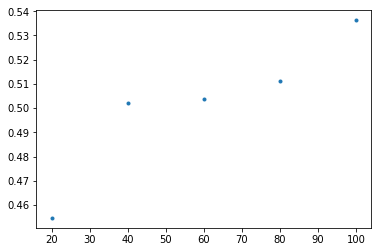

In [42]:
import matplotlib.pyplot as plt
A=[np.mean(scores1),np.mean(scores2),np.mean(scores3),np.mean(scores4),np.mean(scores5)]
plt.plot([20,40,60,80,100],A, '.')

16\. Do the same as above, but this time create an error bar plot where the y errors are given by the standard deviation of the scores you obtained in the 5 folds of the cross-validation. Why is the standard deviation information useful?

<ErrorbarContainer object of 3 artists>

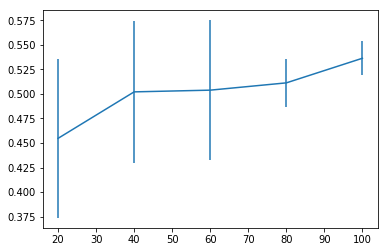

In [54]:
B=[np.std(scores1),np.std(scores2),np.std(scores3),np.std(scores4),np.std(scores5)]
plt.errorbar([20,40,60,80,100],A,yerr=B)